<a href="https://colab.research.google.com/github/datawilly/best_streaming_service/blob/main/Best_Streaming_Service_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de bibliotecas necesarias

En esta sección, importamos las bibliotecas esenciales para el análisis de datos y visualización. Se incluyen:
- **Numpy** y **Pandas**: Para la manipulación y análisis de datos.
- **Plotly** y **Seaborn**: Para crear visualizaciones interactivas y estáticas.
- **Matplotlib**: Biblioteca de visualización básica para gráficos.


In [27]:
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

# Carga del dataset de series de televisión

En esta celda, se carga el dataset utilizando **Pandas**. El archivo CSV contiene información sobre series de televisión en diversas plataformas de streaming. El archivo se carga directamente desde Google Drive para su análisis.

- **df.head()**: Se utiliza para mostrar las primeras cinco filas del dataset y obtener una vista preliminar de la estructura de los datos.


In [28]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Streaming Platforms/tv_shows.csv')

In [29]:
df.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


# Limpieza y preparación de los datos

Realizamos varios pasos de limpieza de datos:
1. **Eliminación de la columna 'Unnamed: 0'**: Esta columna parece ser un índice no relevante, por lo que se elimina.
2. **Limpieza de la columna 'Rotten Tomatoes'**: Se eliminan los símbolos de porcentaje (`%`) y se convierte la columna en valores numéricos tipo `float`. Además, las puntuaciones de Rotten Tomatoes se normalizan dividiéndolas por 10 para que queden en una escala de 0 a 10.
3. **Eliminación de duplicados**: Se eliminan los registros duplicados basados en el título de las series.
4. **Vista general del dataset**: Se imprime el número de filas y columnas tras la limpieza, y se utiliza `df.info()` para mostrar la estructura del dataset, incluyendo los tipos de datos de cada columna.
5. **Estadísticas descriptivas**: Se utiliza `df.describe()` para obtener un resumen estadístico de las columnas numéricas del dataset.


In [30]:
df = df.drop(columns=['Unnamed: 0'], axis = 1)

In [31]:
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.rstrip('%').astype('float')
df['Rotten Tomatoes'] = df['Rotten Tomatoes']/10

In [32]:
df.drop_duplicates('Title',keep='first', inplace=True)

In [33]:
print(f"El dataset contiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El dataset contiene 5564 filas y 10 columnas.


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5564 entries, 0 to 5610
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5564 non-null   object 
 1   Year             5564 non-null   int64  
 2   Age              3137 non-null   object 
 3   IMDb             4408 non-null   float64
 4   Rotten Tomatoes  1004 non-null   float64
 5   Netflix          5564 non-null   int64  
 6   Hulu             5564 non-null   int64  
 7   Prime Video      5564 non-null   int64  
 8   Disney+          5564 non-null   int64  
 9   type             5564 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 478.2+ KB


In [35]:
# Mostrar estadísticas descriptivas
df.describe()

,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
count,5564.000000,4408.000000,1004.000000,5564.000000,5564.000000,5564.000000,5564.000000,5564.0
mean,2011.050503,7.114973,7.763944,0.345974,0.310748,0.382099,0.031991,1.0
std,10.995978,1.131799,2.051256,0.475728,0.462841,0.485944,0.175993,0.0
min,1901.000000,1.000000,0.600000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2010.000000,6.600000,6.700000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2015.000000,7.300000,8.300000,0.000000,0.000000,0.000000,0.000000,1.0
75%,2017.000000,7.900000,9.300000,1.000000,1.000000,1.000000,0.000000,1.0
max,2020.000000,9.600000,10.000000,1.000000,1.000000,1.000000,1.000000,1.0


# Visualización de la distribución de las puntuaciones IMDb y Rotten Tomatoes

En esta celda, se crean gráficos de histogramas para analizar la distribución de las puntuaciones de IMDb y Rotten Tomatoes. Utilizamos **Seaborn** para generar gráficos visualmente atractivos con las siguientes características:
- **IMDb**: Histograma con una curva de densidad (kde) para mostrar la distribución de las puntuaciones de IMDb.
- **Rotten Tomatoes**: Similar al gráfico de IMDb, pero representando las puntuaciones de Rotten Tomatoes.

Ambos gráficos se colocan uno al lado del otro para facilitar la comparación entre las dos métricas.


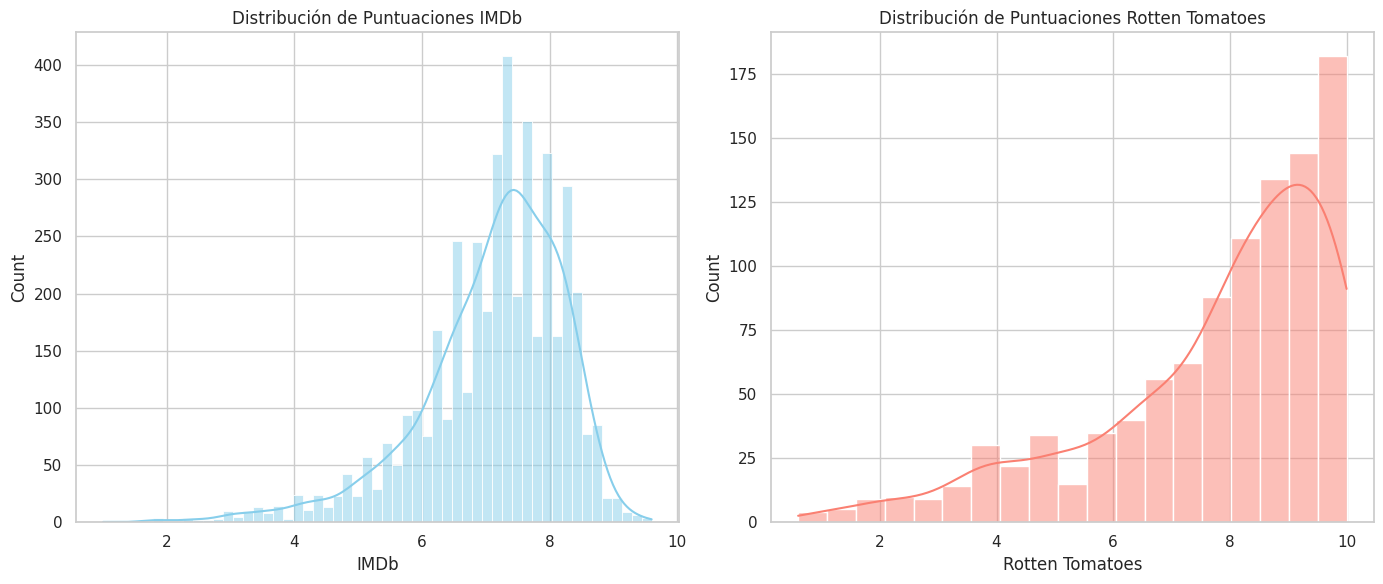

In [36]:
sns.set(style="whitegrid")

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.histplot(df['IMDb'], kde=True, color='skyblue')
plt.title('Distribución de Puntuaciones IMDb')

plt.subplot(1, 2, 2)
sns.histplot(df['Rotten Tomatoes'], kde=True, color='salmon')
plt.title('Distribución de Puntuaciones Rotten Tomatoes')

plt.tight_layout()
plt.show()

# Transformación de los datos y combinación de plataformas de streaming

En esta celda, realizamos una transformación del dataset para trabajar de manera más efectiva con la información sobre las plataformas de streaming:
1. **Transformación de columnas a formato largo**: Se utiliza `pd.melt()` para reorganizar las columnas que contienen información de disponibilidad en plataformas de streaming (`Netflix`, `Hulu`, `Disney+`, `Prime Video`). El resultado es un formato de datos más fácil de manipular, donde cada fila representa una combinación única de título y plataforma.
2. **Filtrado por disponibilidad**: Se filtran las filas para conservar únicamente aquellas en las que el contenido está presente en una plataforma.
3. **Combinación de datasets**: Se combina el dataset transformado con el dataset original para conservar las columnas relevantes.
4. **Eliminación de columnas**: Se eliminan las columnas de las plataformas y el tipo de contenido, ya que no son necesarias para los análisis siguientes.


In [37]:
df_long=pd.melt(df[['Title','Netflix','Hulu','Disney+',
                                'Prime Video']],id_vars=['Title'],
                      var_name='StreamingOn', value_name='Present')
df_long = df_long[df_long['Present'] == 1]
df_long.drop(columns=['Present'],inplace=True)

In [39]:
df_combined = df_long.merge(df, on='Title', how='inner')
df_combined.drop(columns = ['Netflix',
                                  'Hulu', 'Prime Video', 'Disney+', 'type'], inplace=True)

# Filtrado y visualización de la cantidad de títulos por plataforma

En esta celda, realizamos dos acciones importantes:
1. **Filtrado de datos con puntuaciones válidas**: Se crea un nuevo dataframe `df_both_ratings` que incluye solo las series que tienen tanto una puntuación de IMDb mayor a 0 como una puntuación de Rotten Tomatoes mayor a 0, asegurando que trabajamos únicamente con datos completos y válidos.
2. **Visualización de la cantidad de títulos por plataforma**: Se agrupan los datos por plataforma de streaming (`StreamingOn`) y se cuenta cuántos títulos están disponibles en cada una. Luego, se genera un gráfico de barras para visualizar la distribución de contenido en las diferentes plataformas.


<Axes: xlabel='StreamingOn'>

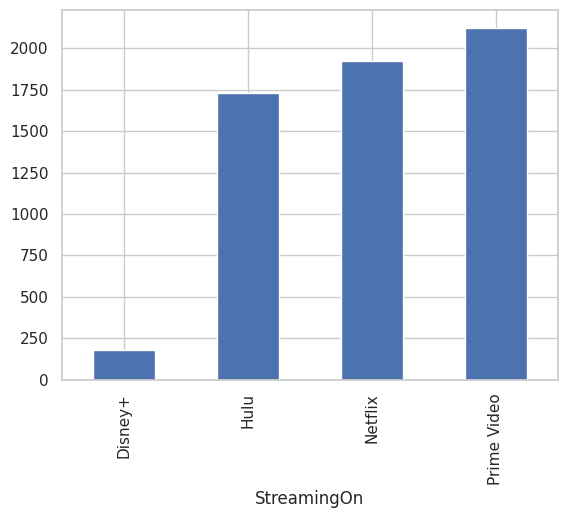

In [40]:
df_both_ratings = df_combined[(df_combined.IMDb > 0) & df_combined['Rotten Tomatoes'] > 0]
df_combined.groupby('StreamingOn').Title.count().plot(kind='bar')

# Visualización de la distribución de puntuaciones IMDb y Rotten Tomatoes por plataforma utilizando gráficos de violín

En esta celda, creamos gráficos de violín para analizar la distribución de las puntuaciones de IMDb y Rotten Tomatoes para cada plataforma de streaming:
1. **Gráficos de violín**: Los gráficos de violín muestran la distribución de las puntuaciones, representando tanto la densidad como el rango de los datos. Esto permite observar cómo se distribuyen las puntuaciones dentro de cada plataforma.
   - El primer gráfico representa las puntuaciones de **IMDb**.
   - El segundo gráfico representa las puntuaciones de **Rotten Tomatoes**.
2. **Uso de subplots**: Se agregan ambos gráficos en una cuadrícula utilizando subplots para facilitar la comparación entre ellos.
3. **Configuración de tamaño**: La disposición del gráfico se ajusta a un tamaño personalizado para asegurarnos de que todos los elementos sean claramente visibles.



In [41]:
figure = []
figure.append(px.violin(df_both_ratings, x = 'StreamingOn', y = 'IMDb', color='StreamingOn'))
figure.append(px.violin(df_both_ratings, x = 'StreamingOn', y = 'Rotten Tomatoes', color='StreamingOn'))
fig = make_subplots(rows=2, cols=4, shared_yaxes=True)

for i in range(2):
    for j in range(4):
        fig.add_trace(figure[i]['data'][j], row=i+1, col=j+1)

fig.update_layout(autosize=False, width=800, height=800)
fig.show()

# Mapa de calor de la correlación entre variables numéricas

En esta celda, se genera un mapa de calor para visualizar la correlación entre las variables numéricas del dataset:
1. **Selección de columnas numéricas**: Se seleccionan todas las columnas que contienen datos numéricos (`float64` e `int64`) para asegurar que solo se incluyan variables que pueden ser correlacionadas matemáticamente.
2. **Cálculo de la matriz de correlación**: Se calcula la correlación entre las variables numéricas utilizando el método de Pearson.
3. **Visualización con un mapa de calor**: Se utiliza **Seaborn** para generar un mapa de calor que muestra la intensidad de la correlación entre las variables. Las anotaciones en el mapa permiten visualizar los valores exactos de correlación, y el color refleja la fuerza y dirección de la correlación (positivo o negativo).


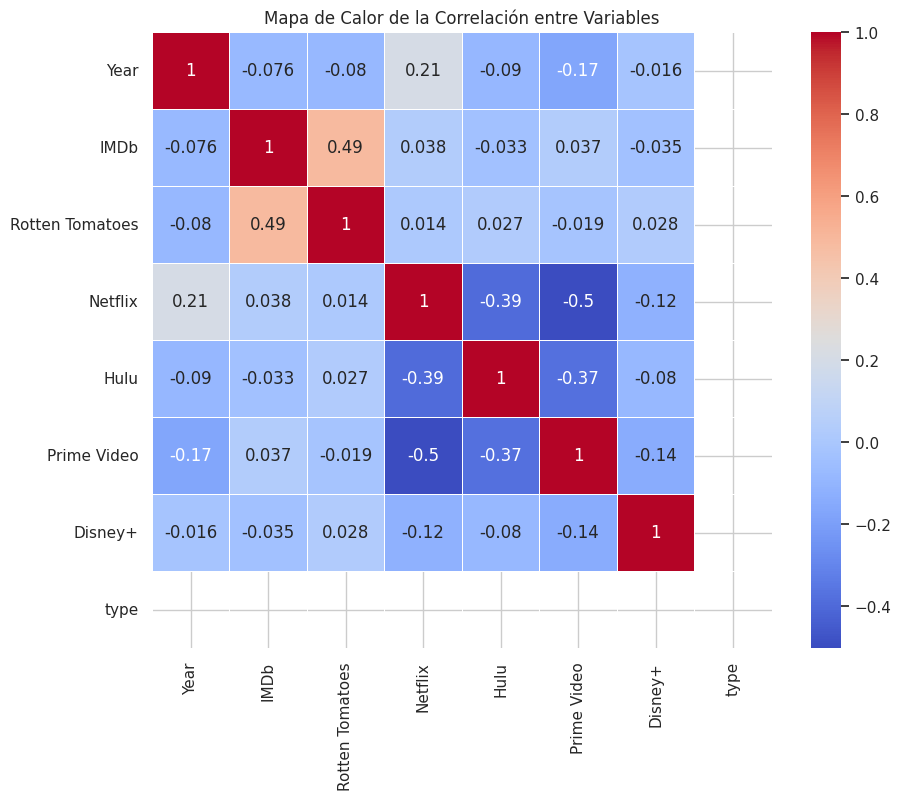

In [43]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Correlación entre Variables')
plt.show()

# Gráfico de dispersión de puntuaciones IMDb vs. Rotten Tomatoes por plataforma

En esta celda, se genera un gráfico de dispersión utilizando **Plotly** para comparar las puntuaciones de IMDb y Rotten Tomatoes de cada serie o película en las diferentes plataformas de streaming:
1. **Ejes del gráfico**:
   - El eje **X** representa las puntuaciones de **IMDb**.
   - El eje **Y** representa las puntuaciones de **Rotten Tomatoes**.
2. **Coloreado por plataforma**: Cada punto en el gráfico está coloreado según la plataforma de streaming a la que pertenece el contenido, permitiendo identificar visualmente diferencias entre las plataformas.
3. **Visualización interactiva**: Dado que **Plotly** es una biblioteca interactiva, puedes acercarte, alejarte y explorar los puntos para obtener más detalles sobre el contenido específico.

Este gráfico permite comparar de forma visual cómo se relacionan las puntuaciones de IMDb y Rotten Tomatoes para cada plataforma y detectar posibles patrones o agrupaciones.


In [44]:
px.scatter(df_both_ratings, x='IMDb',
           y='Rotten Tomatoes',color='StreamingOn')

# Comparación de la distribución de puntuaciones por plataforma

En esta celda, se utilizan gráficos de caja (boxplots) para comparar la distribución de las puntuaciones de IMDb y Rotten Tomatoes por plataforma de streaming:
1. **Gráfico 1: Puntuaciones IMDb**:
   - Se muestra un **boxplot** para cada plataforma de streaming, visualizando la distribución de las puntuaciones de IMDb.
   - El gráfico destaca los valores centrales (mediana), los rangos intercuartílicos y los posibles valores atípicos de las puntuaciones.
2. **Gráfico 2: Puntuaciones Rotten Tomatoes**:
   - Similar al primer gráfico, pero para las puntuaciones de Rotten Tomatoes, proporcionando una visión comparativa entre las plataformas en términos de la percepción crítica.


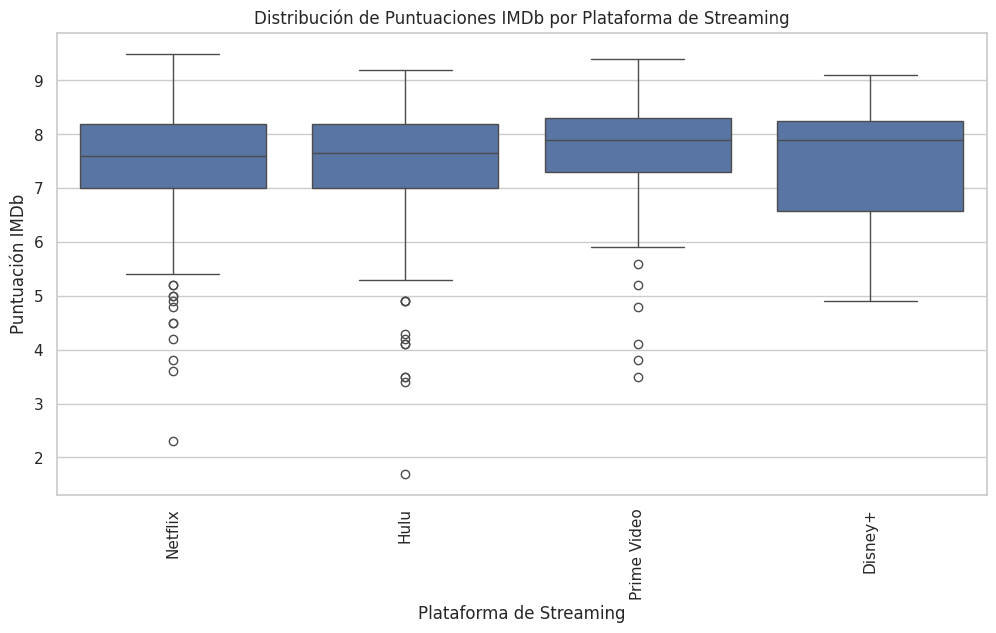

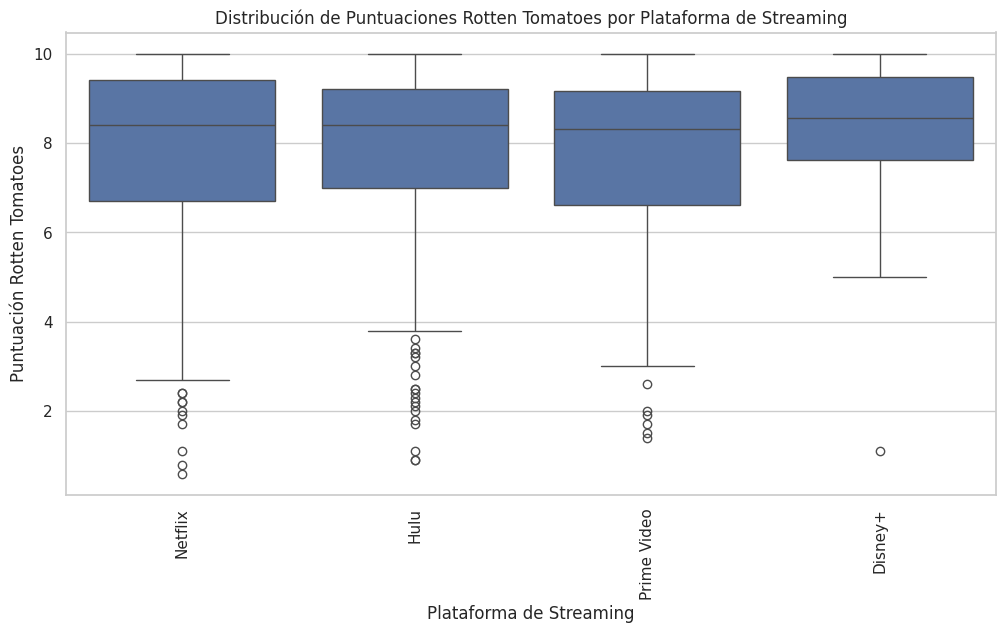

In [47]:
plt.figure(figsize=(12,6))
sns.boxplot(x='StreamingOn', y='IMDb', data=df_both_ratings)
plt.title('Distribución de Puntuaciones IMDb por Plataforma de Streaming')
plt.xlabel('Plataforma de Streaming')
plt.ylabel('Puntuación IMDb')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='StreamingOn', y='Rotten Tomatoes', data=df_both_ratings)
plt.title('Distribución de Puntuaciones Rotten Tomatoes por Plataforma de Streaming')
plt.xlabel('Plataforma de Streaming')
plt.ylabel('Puntuación Rotten Tomatoes')
plt.xticks(rotation=90)
plt.show()


# Distribución de contenido por tipo de público y plataforma de streaming

En esta celda, se genera un gráfico de barras apiladas para mostrar la cantidad de contenido disponible en cada plataforma según la categoría de edad (público objetivo):
1. **Eje X**: Representa las diferentes categorías de edad (variable `Age`), indicando el público objetivo para el contenido (por ejemplo, infantil, adolescentes, adultos).
2. **Eje Y**: Muestra la cantidad de títulos disponibles en cada plataforma.
3. **Hue**: Se utiliza para separar los datos por plataforma de streaming, lo que permite una comparación directa de cuántos títulos están disponibles para cada público en las diferentes plataformas.


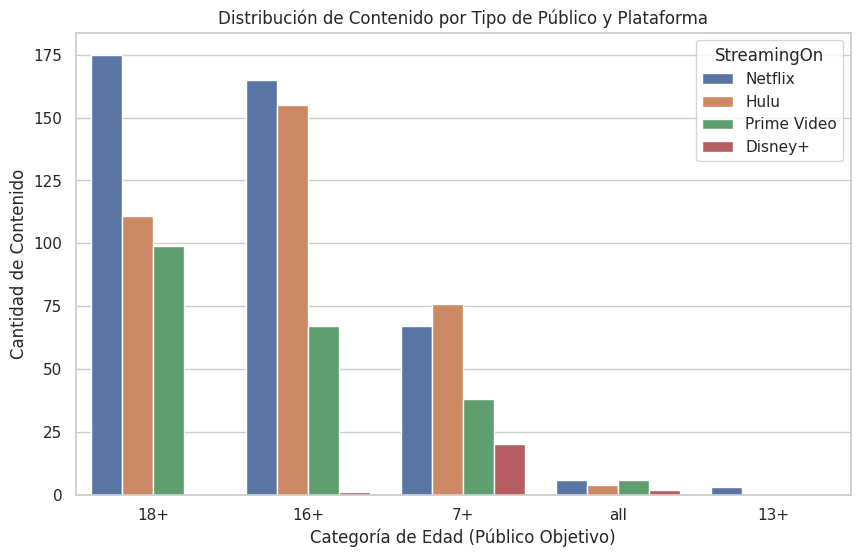

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(x='Age', hue='StreamingOn', data=df_both_ratings)
plt.title('Distribución de Contenido por Tipo de Público y Plataforma')
plt.xlabel('Categoría de Edad (Público Objetivo)')
plt.ylabel('Cantidad de Contenido')
plt.show()

# Comparación de puntuaciones IMDb y Rotten Tomatoes por tipo de público

En esta celda, se visualizan las distribuciones de las puntuaciones de IMDb y Rotten Tomatoes para diferentes categorías de edad del público objetivo:
1. **Gráfico 1: Puntuaciones IMDb por tipo de público**:
   - Se utiliza un **boxplot** para mostrar la distribución de las puntuaciones de IMDb según la categoría de edad.
   - Esto permite analizar si hay diferencias significativas en las puntuaciones para diferentes públicos (infantil, adolescentes, adultos).
2. **Gráfico 2: Puntuaciones Rotten Tomatoes por tipo de público**:
   - Similar al gráfico anterior, pero en este caso se visualizan las puntuaciones de Rotten Tomatoes.
   - Nos permite identificar si ciertas categorías de edad reciben mejores o peores puntuaciones por parte de los críticos.


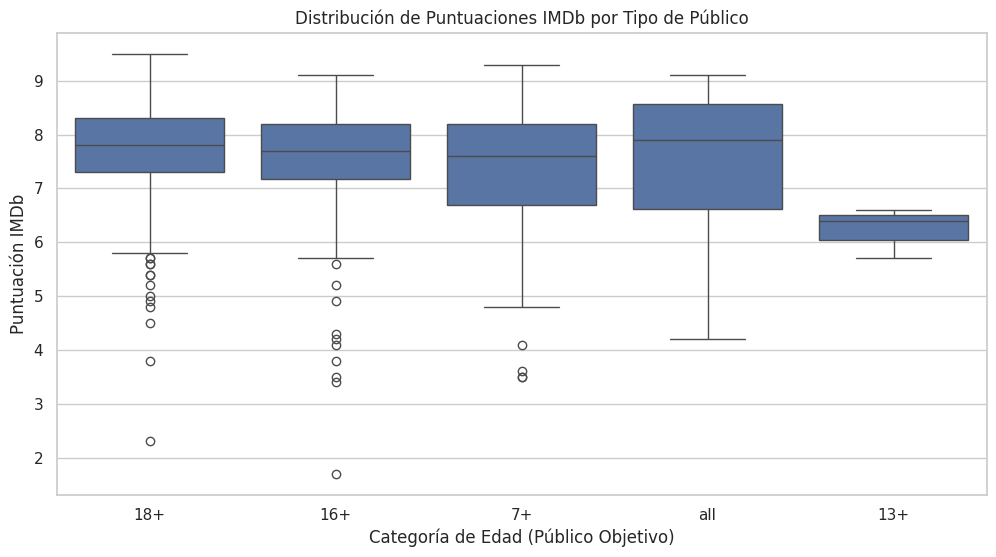

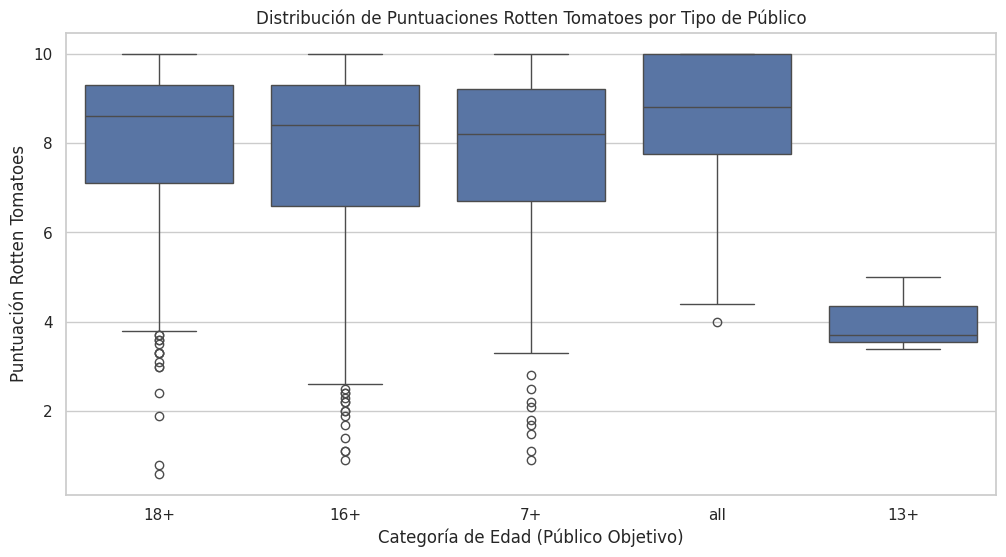

In [57]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Age', y='IMDb', data=df_both_ratings)
plt.title('Distribución de Puntuaciones IMDb por Tipo de Público')
plt.xlabel('Categoría de Edad (Público Objetivo)')
plt.ylabel('Puntuación IMDb')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='Age', y='Rotten Tomatoes', data=df_both_ratings)
plt.title('Distribución de Puntuaciones Rotten Tomatoes por Tipo de Público')
plt.xlabel('Categoría de Edad (Público Objetivo)')
plt.ylabel('Puntuación Rotten Tomatoes')
plt.show()

# Comparación de puntuaciones IMDb y Rotten Tomatoes por plataforma y tipo de público

En esta celda, se comparan nuevamente las puntuaciones de IMDb y Rotten Tomatoes según la plataforma de streaming y el tipo de público objetivo:
1. **Gráfico 1: Puntuaciones IMDb**:
   - Se muestra cómo varían las puntuaciones de IMDb por plataforma de streaming y categoría de edad, permitiendo observar si alguna plataforma tiene mejor desempeño entre diferentes tipos de público.
2. **Gráfico 2: Puntuaciones Rotten Tomatoes**:
   - Similar al gráfico anterior, pero para las puntuaciones de Rotten Tomatoes, mostrando la percepción crítica en diferentes plataformas y categorías de edad.


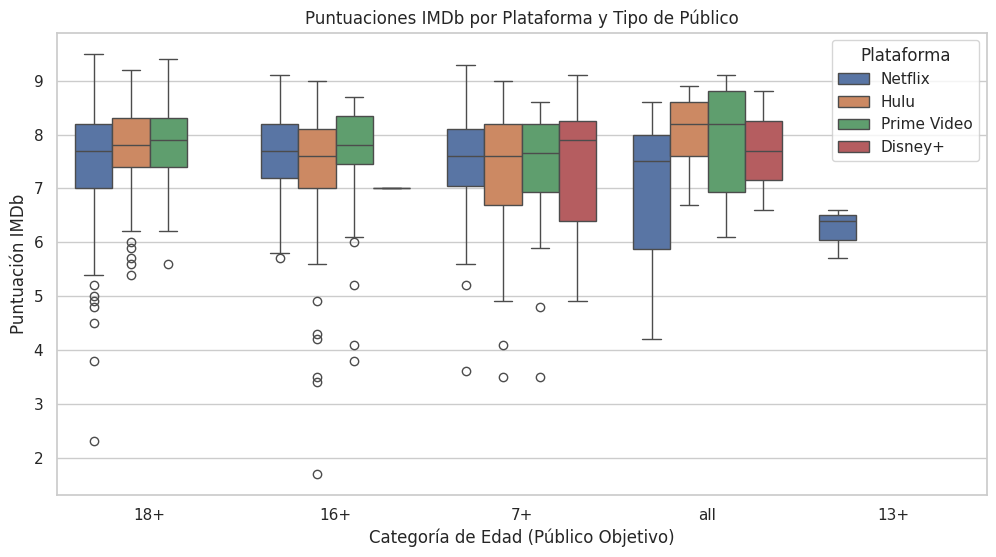

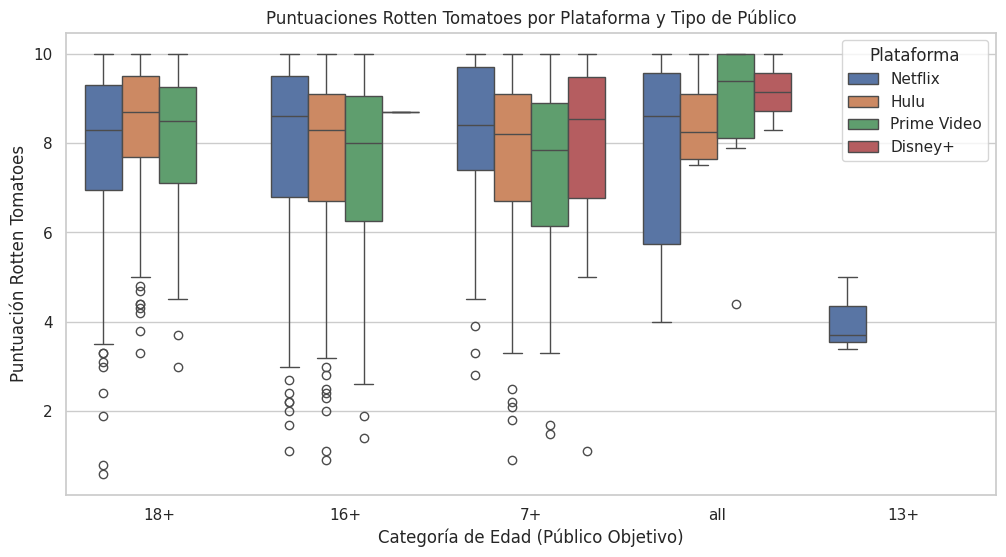

In [58]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Age', y='IMDb', hue='StreamingOn', data=df_both_ratings)
plt.title('Puntuaciones IMDb por Plataforma y Tipo de Público')
plt.xlabel('Categoría de Edad (Público Objetivo)')
plt.ylabel('Puntuación IMDb')
plt.legend(title='Plataforma')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='Age', y='Rotten Tomatoes', hue='StreamingOn', data=df_both_ratings)
plt.title('Puntuaciones Rotten Tomatoes por Plataforma y Tipo de Público')
plt.xlabel('Categoría de Edad (Público Objetivo)')
plt.ylabel('Puntuación Rotten Tomatoes')
plt.legend(title='Plataforma')
plt.show()